In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


   age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0   63    1   3       145   233   ...        2.3      0   0     1       1
1   37    1   2       130   250   ...        3.5      0   0     2       1
2   41    0   1       130   204   ...        1.4      2   0     2       1
3   56    1   1       120   236   ...        0.8      2   0     2       1
4   57    0   0       120   354   ...        0.6      2   0     2       1

[5 rows x 14 columns]
(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
              age         sex     ...            thal      target
count  303.000000  303.000000     ...      303.000000  303.000000
mean    54.366337    0.

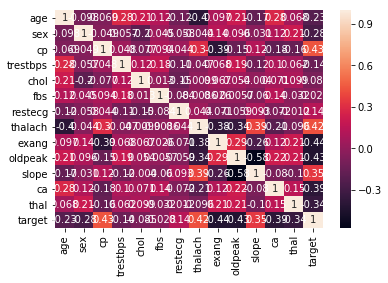

In [2]:
# Importing the dataset
dataset = pd.read_csv("../input/heart.csv")

# Getting to know about abour dataset
print(dataset.head())
print(dataset.shape)
print(dataset.columns)
print(dataset.isnull().sum()) #checking if our dataset has any missing values
print(dataset.describe())
corr = dataset.corr()
sns.heatmap(corr, annot = True)

# Splitting the Dependent & Independent variables from dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the data into Training set & Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [3]:
# Naive Bayes classification technique
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

# making Confusion Matrix for NB classifier
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Accuracy of NB: '{}%'".format(cm1.diagonal().sum() * 100 / cm1.sum()))

Accuracy of NB: '85.24590163934427%'


In [4]:
# Random Forest classification technique
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

# making Confusion Matrix for RF classifier
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print("Accuracy of RF: '{}%'".format(cm2.diagonal().sum() * 100 / cm2.sum()))

[[23  4]
 [ 4 30]]
Accuracy of RF: '86.88524590163935%'


In [5]:
print(classifier2.feature_importances_)
print(classifier2.get_params)

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{
    'n_estimators' : [50, 100, 150, 200],
    'min_samples_split' : [2, 4, 6],
    'min_samples_leaf' : [1, 3, 5, 7],
    'max_depth' : [5, 10, 15, None],
    'max_features' : ['auto', 'sqrt']}]
grid_search = GridSearchCV(estimator = classifier2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

[0.09677737 0.05908109 0.1068762  0.07537235 0.08370422 0.01153974
 0.02263522 0.1330185  0.05590938 0.10325723 0.03796055 0.11820106
 0.0956671 ]
<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>
0.8512396694214877
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [6]:
# Applying Random Forest classification after getting best parameters through Grid Search
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 100, max_features = 'auto', min_samples_leaf = 1,
                                     min_samples_split = 2, max_depth = 5, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

# making Confusion Matrix for updated RF classifier
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
print("Accuracy of updated RF: '{}%'".format(cm3.diagonal().sum() * 100 / cm3.sum()))

[[22  5]
 [ 3 31]]
Accuracy of updated RF: '86.88524590163935%'


In [7]:
# now applying K-fold Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 5)
print(accuracies.mean())
print(accuracies.std())

0.8313333333333333
0.051051716697656485
